# Iris Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv('iris.data', names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], header = None)

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,-1].values

In [6]:
y = np.where(y=='Iris-setosa', 1 , -1)

# Model

In [7]:
class Perceptron:
    def __init__(self, learning_rate = 0.02, epoch = 50, random_state = 42):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.random_state = random_state
        
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0 , 1, -1)
    
    def fit(self, X, y):
        random = np.random.RandomState(self.random_state)
        self.w_ = random.normal(loc = 0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.epoch):
            errors = 0
            for xi, yi in zip(X,y):
                update = self.learning_rate * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self

In [8]:
model = Perceptron(epoch = 10)

In [9]:
model.fit(X,y)

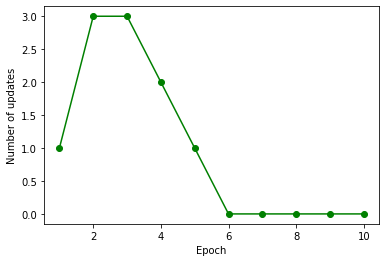

In [10]:
plt.plot(range(1,len(model.errors_) + 1), model.errors_, marker = 'o', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

# Visualing our data

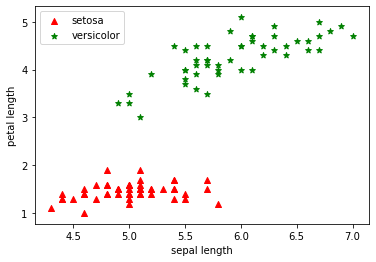

In [11]:
_ = plt.scatter(X[:50,0], X[:50,1], marker = '^', color = 'red', label = 'setosa')
_ = plt.scatter(X[50:,0], X[50:,1], marker = '*', color = 'green', label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
markers = ('s','x','o','^','v')
colors = ('red','blue','lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

In [14]:
markers

('s', 'x', 'o', '^', 'v')

In [15]:
cmap

In [16]:
X1_min, X1_max = X[:,0].min() - 1, X[:,0].max() + 1


In [17]:
print(X1_min, X1_max)

3.3 8.0


In [18]:
X2_min, X2_max = X[:,1].min() - 1, X[:,1].max() + 1

In [19]:
print(X2_min, X2_max)

0.0 6.1


In [20]:
xx1, xx2 = np.meshgrid(
            np.arange(X1_min, X1_max, 0.02),
            np.arange(X2_min, X2_max, 0.02)
)

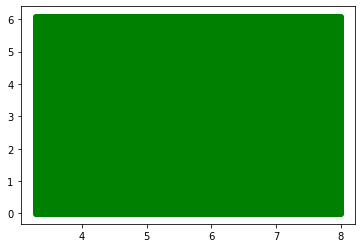

In [21]:
plt.scatter(xx1, xx2, marker =  'o', color = 'green')

In [22]:
xx1

array([[3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98],
       [3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98],
       [3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98],
       ...,
       [3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98],
       [3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98],
       [3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98]])

In [23]:
xx2

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
       ...,
       [6.04, 6.04, 6.04, ..., 6.04, 6.04, 6.04],
       [6.06, 6.06, 6.06, ..., 6.06, 6.06, 6.06],
       [6.08, 6.08, 6.08, ..., 6.08, 6.08, 6.08]])

In [24]:
a = [1,2,3]
b = [4,5,6]

In [25]:
a1, a2 = np.meshgrid(a,b)

In [26]:
a1

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [27]:
a2

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [28]:
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

In [29]:
print(Z)

[ 1  1  1 ... -1 -1 -1]


In [40]:
temp = np.array([xx1.ravel(), xx2.ravel()]).T

In [56]:
temp.T

array([[3.3 , 3.32, 3.34, ..., 7.94, 7.96, 7.98],
       [0.  , 0.  , 0.  , ..., 6.08, 6.08, 6.08]])

In [41]:
temp

array([[3.3 , 0.  ],
       [3.32, 0.  ],
       [3.34, 0.  ],
       ...,
       [7.94, 6.08],
       [7.96, 6.08],
       [7.98, 6.08]])

In [42]:
Z = Z.reshape(xx1.shape)

In [43]:
xx1.shape

(305, 235)

In [44]:
xx2.shape

(305, 235)

In [45]:
Z

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

(0.0, 6.08)

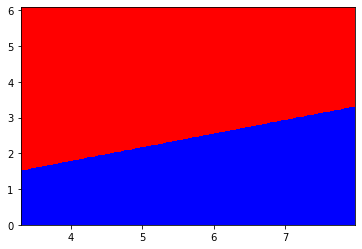

In [46]:
plt.contourf(xx1,xx2, Z, cmap = cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X[:,0], X[:,1], col

In [47]:
X[0,0]

5.1

In [48]:
np.unique(y)

array([-1,  1])

In [49]:
for idx, cl in enumerate(np.unique(y)):
    print(idx,cl)

0 -1
1 1


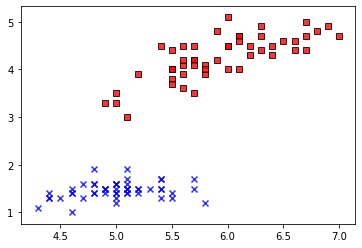

In [51]:
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0],
                y = X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = cl,
                edgecolor  = 'black'
               )

In [52]:
X[y==1, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [55]:
X[y==1,1]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [58]:
a = np.array([[1,2],[3,4]])
print(a.shape)
b = a.ravel()
print(b.shape)

(2, 2)
(4,)


# Decision plot region

In [92]:
def decision_plot_region(X, y, classifier , resolution = 0.02):
    color = ('red','green','blue', 'yellow','orange', 'pink')
    markers = ('o','*','^','v','s')
    cmap = ListedColormap(color[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    
    
    plt.contourf(xx1, xx2, Z, alpha = 0.8, cmap = cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0], y = X[y==cl,1], marker = markers[idx], color = colors[idx], label = cl, edgecolor = 'black')
    
    return Z

    

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


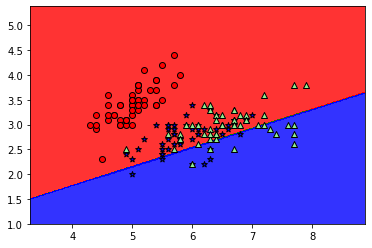

In [90]:
decision_plot_region(X,y, model)

# Higher Dimensionality Data 

In [68]:
column = ['sepal length', 'sepal width', 'petal length', 'petal width','class']
df = pd.read_csv('iris.data', names = column, header = None)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [71]:
X, y = df.iloc[:,:-1].values, df.iloc[:,-1].values

In [72]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
y = np.where(y=='Iris-setosa', -1 , np.where(y=='Iris-versicolor', 0, 1))

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
x_ = StandardScaler().fit_transform(X)

In [78]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)

In [81]:
new_df = pca.fit_transform(x_)

In [82]:
new_df.shape

(150, 2)

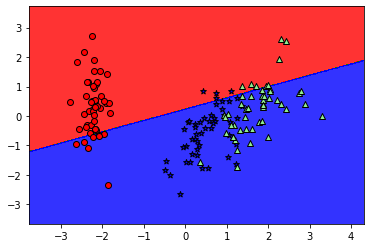

In [93]:
temp = decision_plot_region(new_df, y, model)

In [95]:
np.unique(temp)

array([-1,  1])

In [96]:
np.unique(y)

array([-1,  0,  1])

In [99]:
model = Perceptron()

In [100]:
model.fit(new_df,y)

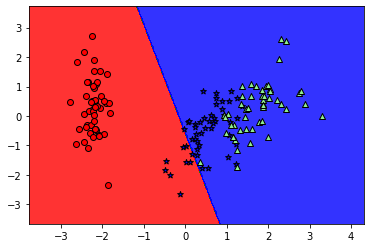

In [102]:
temp = decision_plot_region(new_df,y, model)

In [103]:
np.unique(temp)

array([-1,  1])

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
model = LogisticRegression()

In [106]:
model.fit(new_df,y)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([[-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1]])

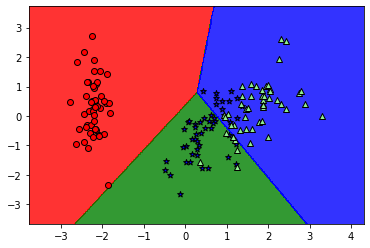

In [107]:
decision_plot_region(new_df, y, model)

# Implementing Adaline in Python

Adaline neural network uses activation function to update its weight, and it happen in batches that mean every samples is considered in making weight update rather than Perceptron where weight get updated at each sample run

In [126]:
class AdalineGD(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)>=0.0, 1, -1))
    
    

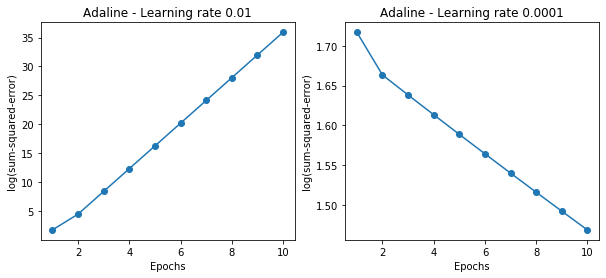

In [127]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)  + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)  + 1), np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [112]:
a = np.array([[1,2,3],[4,5,6]])

In [113]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [114]:
a.shape

(2, 3)

In [115]:
b = np.array([7,8,9])

In [119]:
b = b.reshape(1,3)

In [123]:
a.dot(b.T)

array([[ 50],
       [122]])

In [128]:
a 

array([[1, 2, 3],
       [4, 5, 6]])

In [129]:
b

array([[7, 8, 9]])

In [130]:
a.shape

(2, 3)

In [131]:
b.shape

(1, 3)

In [133]:
np.matmul(a,b.T)

array([[ 50],
       [122]])

In [135]:
np.dot(a,b.T)

array([[ 50],
       [122]])

In [136]:
a = np.array([1,2,3])

In [137]:
b = np.array([[1,2,3],[4,5,6]])

In [138]:
np.dot(b,a)

array([14, 32])

In [139]:
np.matmul(b,a)

array([14, 32])

In [140]:
np.dot(a,b)

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In [142]:
np.dot(a,2)

array([2, 4, 6])